Idea for spectrogram error bars

1. For each pixel get the dist that go into thwt ais plotted. 
1. Resample each based on the dist
1. replot
1. repeat and see which are still there

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pymc3 as pm


sns.set(font_scale=1.5)

In [41]:
with pm.Model() as model:
    means = pm.Uniform('means', 0, 100, shape=5)
    p = pm.Poisson('p', means, shape=5, observed=[30, 35, 20, 45, 16])
    avg = pm.Deterministic('avg', pm.math.sum(means, axis=0)/5)
    
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [means]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:08<00:00, 4804.31draws/s]


In [42]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
means[0],30.942,5.560,20.990,41.694,0.025,0.018,51203.0,47125.0,51744.0,32692.0,1.0
means[1],36.009,6.025,24.581,47.065,0.026,0.019,51721.0,47832.0,53308.0,29860.0,1.0
means[2],20.994,4.595,12.543,29.629,0.021,0.015,47577.0,45570.0,47706.0,32027.0,1.0
means[3],45.984,6.782,33.272,58.531,0.027,0.020,61964.0,57900.0,63520.0,32786.0,1.0
means[4],16.985,4.127,9.663,24.858,0.018,0.013,52040.0,47426.0,53526.0,32595.0,1.0
avg,30.183,2.455,25.738,34.887,0.011,0.007,54389.0,53629.0,54645.0,34204.0,1.0


/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefda40ae50>,
      dtype=object)

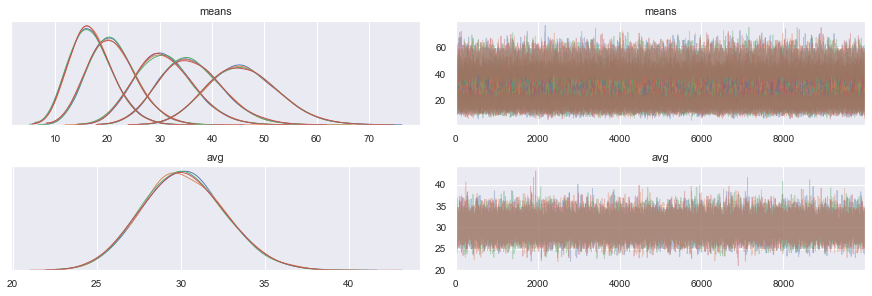

In [43]:
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fefdba9d910>,
      dtype=object)

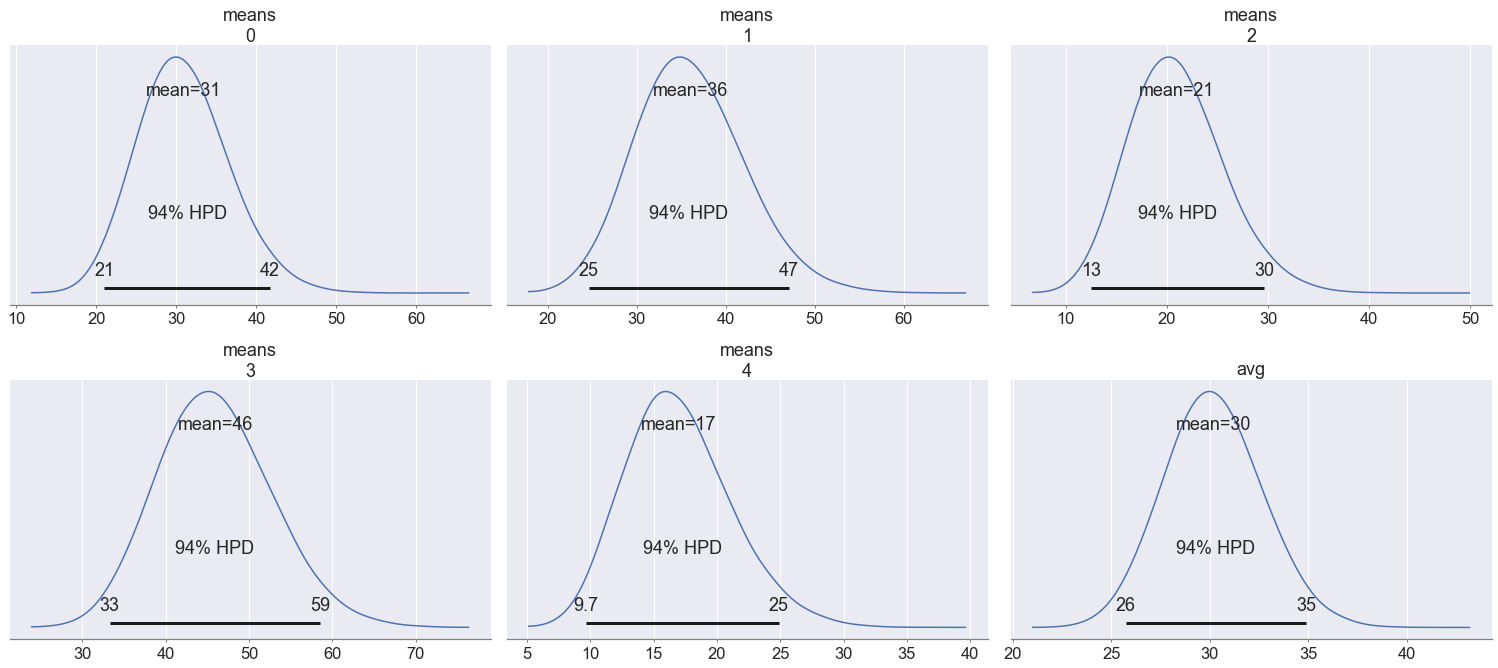

In [44]:
pm.plot_posterior(trace)

In [45]:
print(np.average([30, 35, 20, 45, 16]))

29.2
